In [9]:
from qiskit import *

IBMQ.save_account('95d7606045a3360b89085d323d855372ccd4148396391fab24c3950349608575b7dff70964afc6803168bcedb1826fb3437c3e86658d447eccb9233795c8c3dc', overwrite=True)
####################### Crear circuito 
import numpy as np
from qiskit.visualization import plot_histogram
%matplotlib inline

# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

qc = circ + meas

####################### Crear circuito 

provider = IBMQ.load_account()
backend = provider.backends.ibmq_santiago
qobj = assemble(transpile(qc, backend=backend), backend=backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())



ibmqfactory.load_account:WARNING:2021-03-13 19:17:33,183: Credentials are already in use. The existing account in the session will be replaced.


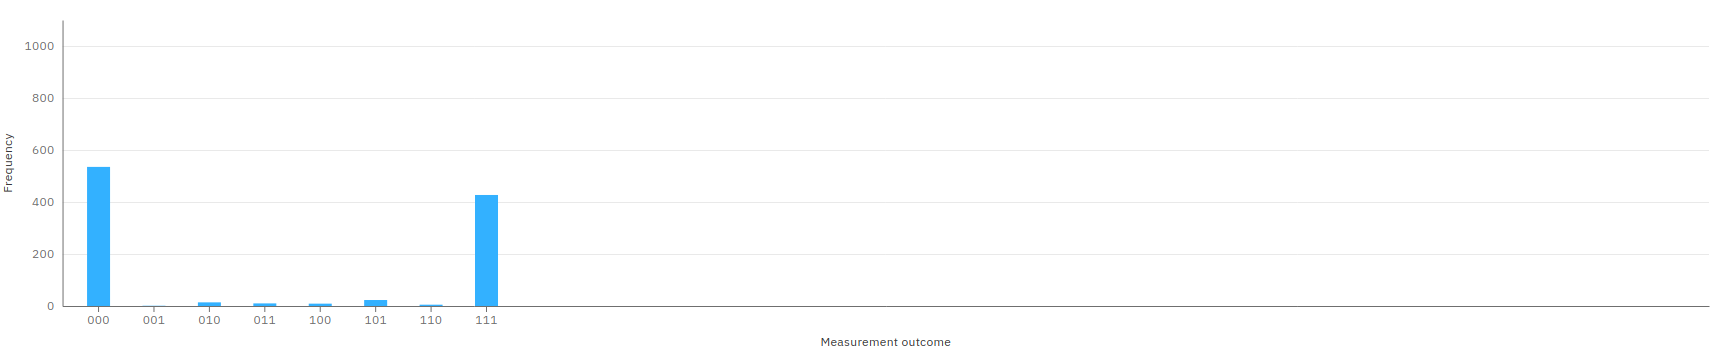

In [15]:
from IPython import display
display.Image("bar-chart.png")

#Los resultados del computador de Santiago son buenos, aunque por supuesto, mejorables. En este caso el '000' se da
#un 30% más que el '111' más o menos, cuando idealmente tendrían que ser iguales, además, la suma de las demás 
#mediciones, que no deberían de darse, en podría llegar al 15% de error.

In [20]:
from qiskit import *

IBMQ.save_account('95d7606045a3360b89085d323d855372ccd4148396391fab24c3950349608575b7dff70964afc6803168bcedb1826fb3437c3e86658d447eccb9233795c8c3dc', overwrite=True)
####################### Crear circuito 
import numpy as np
from qiskit.visualization import plot_histogram
%matplotlib inline

# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

qc = circ + meas

####################### Crear circuito 

provider = IBMQ.load_account()
backend = provider.backends.ibmq_belem
qobj = assemble(transpile(qc, backend=backend), backend=backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

ibmqfactory.load_account:WARNING:2021-03-13 19:49:12,743: Credentials are already in use. The existing account in the session will be replaced.


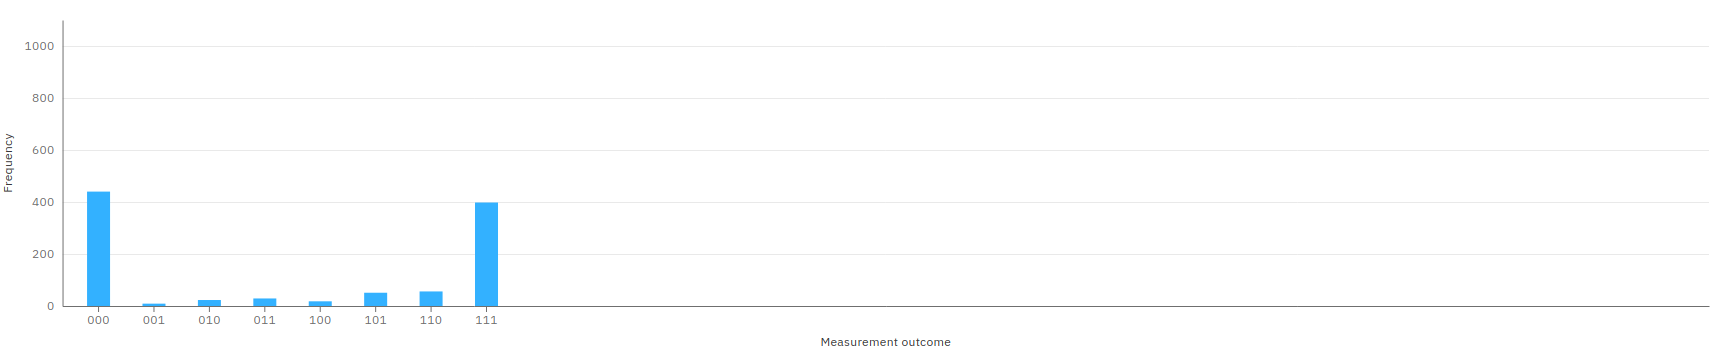

In [16]:
from IPython import display
display.Image("bar-chart(1).png")

#En el computador de Belem pasa lo contrario a lo que pasa en Santiago. La frecuencia con la que colapsa en '000' y
#'111' están más cerca de ser iguales, pero a la hora de sumar las demás mediciones que no deberían darse, 
#podríamos llegar a tener hasta un 20% de frecuencia de errores

In [22]:
from qiskit import *

IBMQ.save_account('95d7606045a3360b89085d323d855372ccd4148396391fab24c3950349608575b7dff70964afc6803168bcedb1826fb3437c3e86658d447eccb9233795c8c3dc', overwrite=True)
####################### Crear circuito 
import numpy as np
from qiskit.visualization import plot_histogram
%matplotlib inline

# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

qc = circ + meas

####################### Crear circuito 

provider = IBMQ.load_account()
backend = provider.backends.ibmq_16_melbourne
qobj = assemble(transpile(qc, backend=backend), backend=backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

ibmqfactory.load_account:WARNING:2021-03-13 19:51:03,709: Credentials are already in use. The existing account in the session will be replaced.


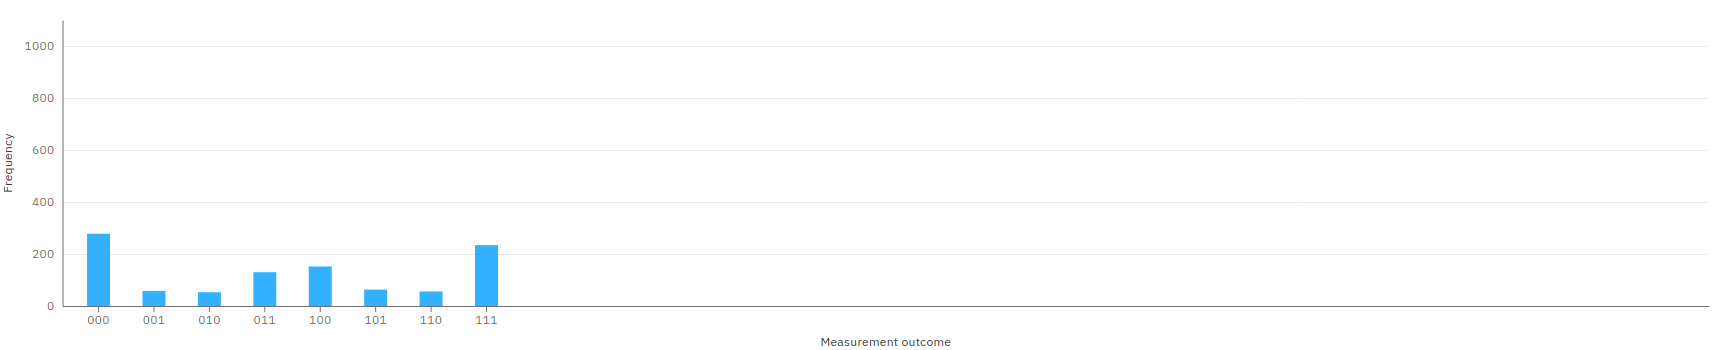

In [17]:
from IPython import display
display.Image("bar-chart(2).png")

#El computador de Melbourne deja claro el reto que todavía tenemos por delante para la corrección de errores (QEC).
#A diferencia del computador de Santiago y Belem, que tienen 5 qubits, el computador de Melbourne tiene 15, 
#esto hace que sea más difícil su manipulación. Podría decirse que hay un 40% de frecuencia de estados no deseados

ibmqfactory.load_account:WARNING:2021-03-13 19:38:10,622: Credentials are already in use. The existing account in the session will be replaced.


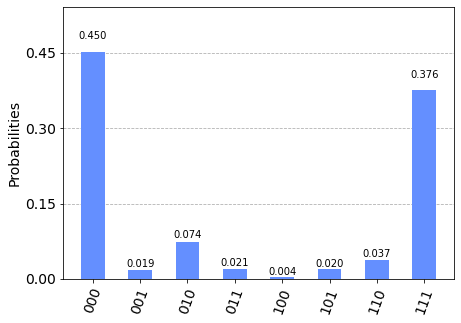

In [18]:

from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

# Construir un modelo de ruido a partir de las características de un backend real
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_santiago')
noise_model = NoiseModel.from_backend(backend)
# Obtener el mapa de interconexión de los qubits
coupling_map = backend.configuration().coupling_map
# Obtener las características de las puertas básicas
basis_gates = noise_model.basis_gates

####################### Crear circuito
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

qc = circ + meas
####################### Crear circuito

result = execute(qc, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

counts_noise = result.get_counts(qc)
plot_histogram(counts_noise, title="")